# Demo 

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
from keras.utils.np_utils import to_categorical
# Prepare data
# load data mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
#print(X_train.shape) #--> not 28,28,1
#print(Y_train) #--> label not correct with output (vector 0 and 1)

# Reshape and normalizer
X_train = X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')/255
X_test = X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')/255

Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)
print(X_train.shape) 
print(Y_train)

(60000, 28, 28, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [33]:
# Create Model using Sequential API
model =tf.keras.Sequential()
#<<<Create 9 layer>>>#
# Input data size 28x28 
model.add(tf.keras.Input(shape=(28,28,1))) # 1 is gray image
# Convolutional I Size 24x24
model.add(layers.Conv2D(10,5,strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
# Convolutional II Size 8x8
model.add(layers.Conv2D(20,5,strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
# Dropout Size 4x4 and Flatten Maxtri to Vector
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
# Neural Network
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 20)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 4, 4, 20)          0         
                                                                 
 flatten_7 (Flatten)         (None, 320)              

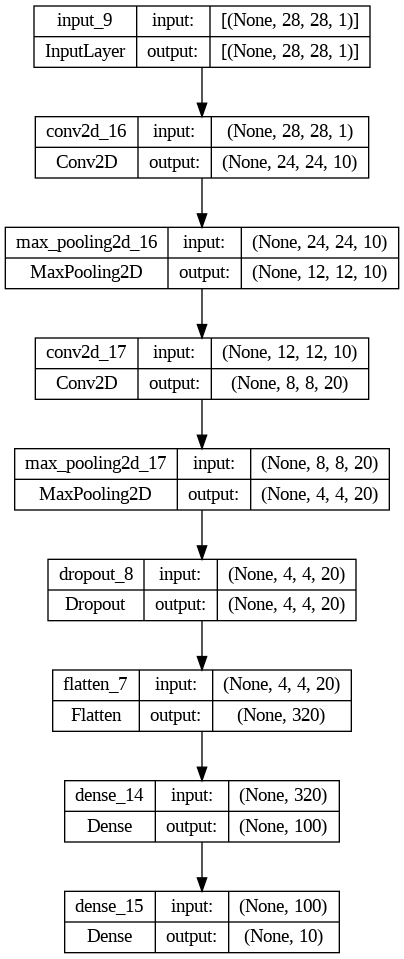

In [34]:
# Show neural network
model.summary()
# Draw Graph
tf.keras.utils.plot_model(model,'model.png',show_shapes=True)

In [35]:
# Compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [36]:
# Training model
# Data đầu vào 60000
# epochs = số lần học , epochos = 10 ; 10(lần)x64(nhóm nhỏ)
# batch_size = khối lượng học, 64 nhóm nhỏ (48000/64 = 750 image) 
# Total image fro training = 10 x 750 = 7500 imgae -> chưa phải toàn bộ data
# validation_split= 20% ktra bước(12000 image), 80% training (48000 image)
# verbose = 1 hiển thị tất cả các bước training

history = model.fit(X_train,Y_train,epochs=10,batch_size=64,verbose=1,validation_split=0.2)
score = model.evaluate(X_test,Y_test, verbose=2)
print("loss = ",score[0])
print('accuracy = ',score)

Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.2888 - accuracy: 0.9122 - val_loss: 0.0763 - val_accuracy: 0.9758
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0902 - accuracy: 0.9722 - val_loss: 0.0558 - val_accuracy: 0.9821
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0664 - accuracy: 0.9798 - val_loss: 0.0494 - val_accuracy: 0.9847
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0563 - accuracy: 0.9823 - val_loss: 0.0487 - val_accuracy: 0.9859
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.0432 - val_accuracy: 0.9865
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0397 - val_accuracy: 0.9877
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 

In [37]:
# Test
# số 1 ở trước là 1 tấm ảnh
x = tf.ones((1,28,28,1))
model.predict(x)

1/1 [==============================] - 0s 64ms/step


array([[0.1203219 , 0.21648593, 0.04731702, 0.04615895, 0.10350773,
        0.08064499, 0.07810134, 0.08477402, 0.14065358, 0.08203459]],
      dtype=float32)